## Check if PyTorch is running on GPU

In [1]:
import torch

# Check if a CUDA-enabled GPU is available
if torch.cuda.is_available():
    print("CUDA is available. PyTorch can use the GPU.")

    # Get the number of available GPUs
    gpu_count = torch.cuda.device_count()
    print(f"Number of available GPUs: {gpu_count}")

    # Get the name of the current GPU
    current_gpu_name = torch.cuda.get_device_name(0) # 0 is typically the default GPU
    print(f"Current GPU Name: {current_gpu_name}")

    # Optional: Create a tensor and move it to the GPU to confirm
    try:
        tensor_gpu = torch.randn(3, 3).cuda()
        print("\nSuccessfully created a tensor on the GPU:")
        print(tensor_gpu)
    except Exception as e:
        print(f"\nCould not create a tensor on the GPU. Error: {e}")

else:
    print("CUDA is not available. PyTorch is running on the CPU.")

print("\nPyTorch version:", torch.__version__)

CUDA is available. PyTorch can use the GPU.
Number of available GPUs: 1
Current GPU Name: NVIDIA GeForce RTX 3070 Laptop GPU

Successfully created a tensor on the GPU:
tensor([[ 0.0410, -1.4792,  0.8729],
        [-0.1489,  0.8015, -1.2818],
        [-1.1320,  0.6230,  0.2436]], device='cuda:0')

PyTorch version: 2.8.0.dev20250423+cu128


## Set Dataset Paths

In [54]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from PIL import Image

# --- PIL MAX_IMAGE_PIXELS ---
LIMIT = 200000000 # This makes it so that pillow warnings aren't triggered since we have some images above the default pixel limit
Image.MAX_IMAGE_PIXELS = LIMIT
print(f"Pillow MAX_IMAGE_PIXELS limit increase to: {Image.MAX_IMAGE_PIXELS}")

# --- Configuration ---
train_data_path = 'C:/Users/p2fre/.cache/kagglehub/datasets/tristanzhang32/ai-generated-images-vs-real-images/versions/2/train'
real_path = os.path.join(train_data_path, 'real')
fake_path = os.path.join(train_data_path, 'fake')

# --- Check if path exists ---
if not os.path.isdir(train_data_path):
    print(f"Error: Training data path not found at {train_data_path}")
    exit()
elif not os.path.isdir(real_path) or not (fake_path):
    print(f"Error: Subdirectories not found at {train_data_path}")
    exit()
else:
    print("Dataset paths seem correct")

Pillow MAX_IMAGE_PIXELS limit increase to: 200000000
Dataset paths seem correct


## List Image Files

In [5]:
try:
    real_images = [f for f in os.listdir(real_path) if os.path.isfile(os.path.join(real_path, f))]
    fake_images = [f for f in os.listdir(fake_path) if os.path.isfile(os.path.join(fake_path, f))]
    print(f"Found {len(real_images)} real images and {len(fake_images)} fake images in training set.")

    # Basic check if images were found
    if not real_images or not fake_images:
         print("Warning: One or both image folders might be empty or contain no files.")

except Exception as e:
    print(f"Error listing image files: {e}")

Found 24000 real images and 24000 fake images in training set.


## Show Sample Images

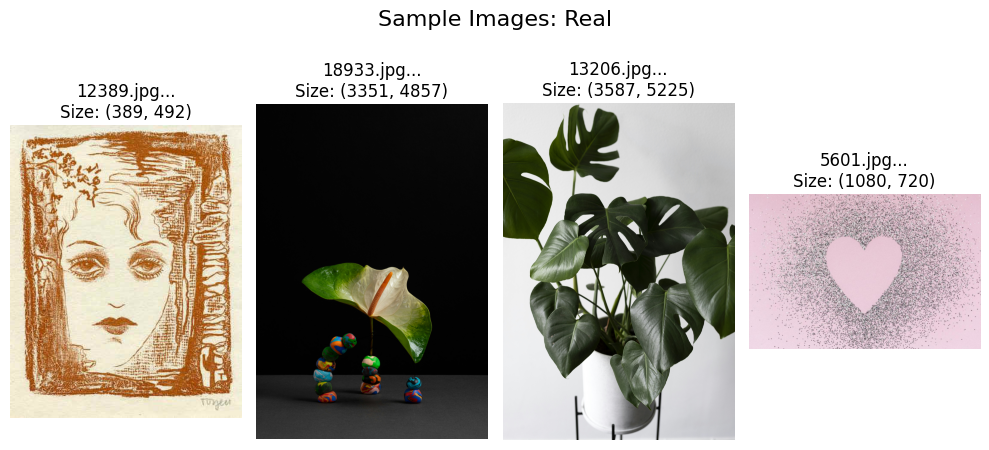

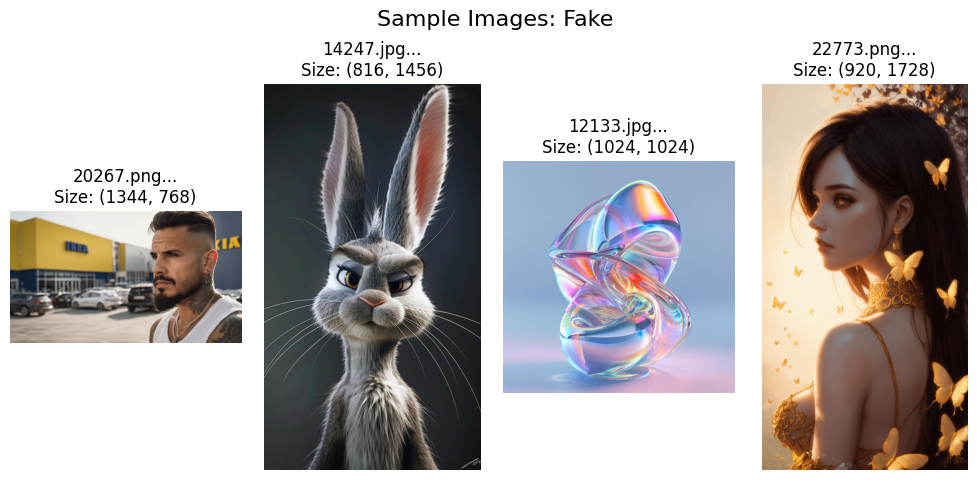

In [13]:
def show_sample_images(image_list, image_path, title, num_samples=4):
    if not image_list:
        print(f"Cannot show samples for {title}: No images found.")
        return

    sample_files = random.sample(image_list, min(num_samples, len(image_list)))
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Sample Images: {title}", fontsize=16)

    for i, file_name in enumerate(sample_files):
        try:
            img_full_path = os.path.join(image_path, file_name)
            img = Image.open(img_full_path)

            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(f"{file_name[:10]}...\nSize: {img.size}") # Show partial name and size
            plt.axis('off')
        except Exception as e:
            print(f"Error loading or displaying image {file_name}: {e}")
            plt.subplot(1, num_samples, i + 1)
            plt.text(0.5, 0.5, 'Error loading', horizontalalignment='center', verticalalignment='center')
            plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# Show samples (if image lists were populated successfully)
if 'real_images' in locals() and real_images:
    show_sample_images(real_images, real_path, "Real")
if 'fake_images' in locals() and fake_images:
    show_sample_images(fake_images, fake_path, "Fake")

## Get Image Dimensions

In [30]:
def get_image_dimensions(image_list, image_path, sample_size=24000):
    dimensions = []
    files_to_process = random.sample(image_list, min(sample_size, len(image_list)))

    for file_name in files_to_process:
        try:
            img_full_path = os.path.join(image_path, file_name)
            with Image.open(img_full_path) as img:
                dimensions.append(img.size) # (width, height)
        except Exception as e:
            print(f"Warning: Could not read dimensions for {file_name}: {e}")
    return dimensions

# Get dimensions (if image lists were populated successfully)
real_dims = []
fake_dims = []
if 'real_images' in locals() and real_images:
    print("\nAnalyzing dimensions for real images...")
    real_dims = get_image_dimensions(real_images, real_path, sample_size=24000)
    print(f"Collected dimensions for {len(real_dims)} real images.")

if 'fake_images' in locals() and fake_images:
    print("\nAnalyzing dimensions for fake images...")
    fake_dims = get_image_dimensions(fake_images, fake_path, sample_size=24000)
    print(f"Collected dimensions for {len(fake_dims)} fake images.")

# Basic stats
if real_dims:
    real_widths = [d[0] for d in real_dims]
    real_heights = [d[1] for d in real_dims]
    print(f"\nReal Image Stats (Training Set):")
    print(f"  Avg Width: {np.mean(real_widths):.2f}, Avg Height: {np.mean(real_heights):.2f}")
    print(f"  Min Width: {np.min(real_widths)}, Min Height: {np.min(real_heights)}")
    print(f"  Max Width: {np.max(real_widths)}, Max Height: {np.max(real_heights)}")

if fake_dims:
    fake_widths = [d[0] for d in fake_dims]
    fake_heights = [d[1] for d in fake_dims]
    print(f"\nFake Image Stats (Training Set):")
    print(f"  Avg Width: {np.mean(fake_widths):.2f}, Avg Height: {np.mean(fake_heights):.2f}")
    print(f"  Min Width: {np.min(fake_widths)}, Min Height: {np.min(fake_heights)}")
    print(f"  Max Width: {np.max(fake_widths)}, Max Height: {np.max(fake_heights)}")


Analyzing dimensions for real images...
Collected dimensions for 24000 real images.

Analyzing dimensions for fake images...
Collected dimensions for 24000 fake images.

Real Image Stats (Sample):
  Avg Width: 2218.25, Avg Height: 2202.42
  Min Width: 236, Min Height: 227
  Max Width: 16384, Max Height: 10944

Fake Image Stats (Sample):
  Avg Width: 1243.60, Avg Height: 1189.79
  Min Width: 224, Min Height: 224
  Max Width: 11776, Max Height: 17973


## Plot Dimensions Histogram

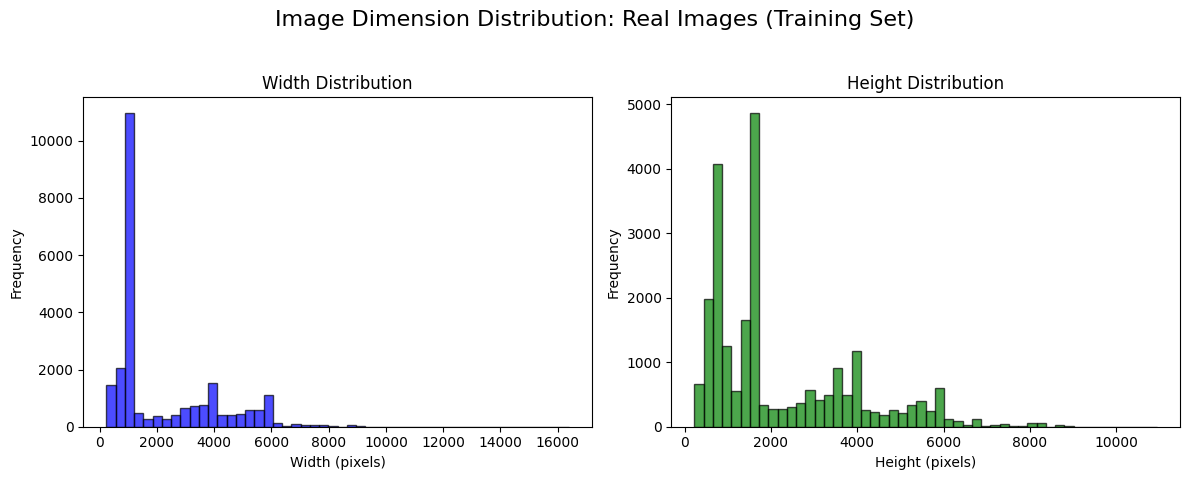

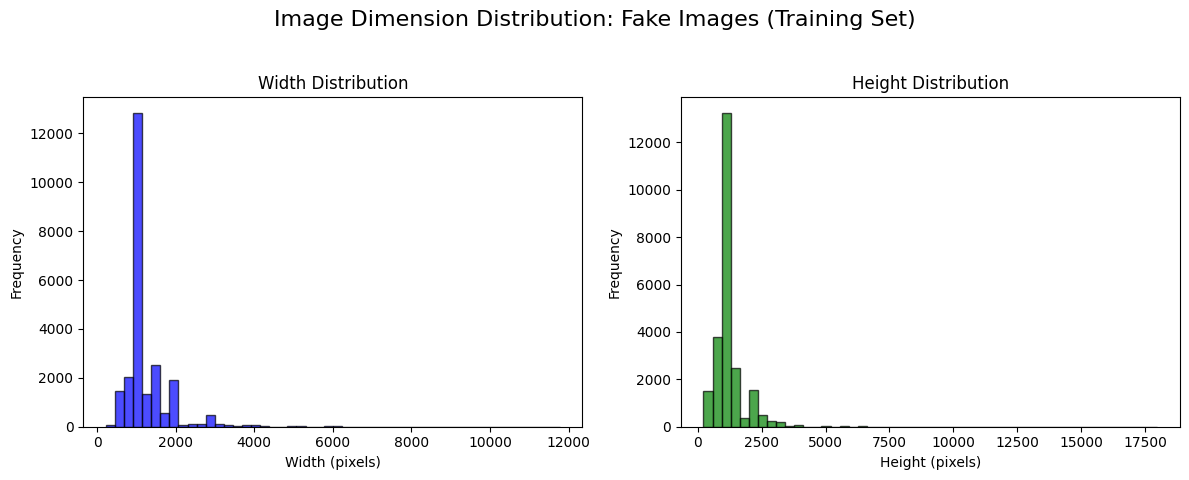

In [37]:
def plot_dimension_histogram(dimensions, title):
    if not dimensions:
        print(f"Cannot plot dimensions for {title}: No data.")
        return
    widths = [d[0] for d in dimensions]
    heights = [d[1] for d in dimensions]

    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Image Dimension Distribution: {title}", fontsize=16)

    # Width Histogram
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=50, color='blue', edgecolor='black', alpha=0.7)
    plt.title("Width Distribution")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")

    # Height Histogram
    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=50, color='green', edgecolor='black', alpha=0.7)
    plt.title("Height Distribution")
    plt.xlabel("Height (pixels)")
    plt.ylabel("Frequency")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot histograms for real and fake dimensions
if real_dims:
    plot_dimension_histogram(real_dims, "Real Images (Training Set)")
if fake_dims:
    plot_dimension_histogram(fake_dims, "Fake Images (Training Set)")

## Calculate Aspect Ratios

In [43]:
def calculate_aspect_ratios(dimensions_list):
    aspect_ratios = []
    for width, height in dimensions_list:
        if height > 0: # Avoid division by zero
            aspect_ratios.append(width / height)
        else:
            aspect_ratios.append(0) # Or handle as appropriate
    return aspect_ratios

real_aspect_ratios = []
fake_aspect_ratios = []

if 'real_dims' in locals() and real_dims:
    real_aspect_ratios = calculate_aspect_ratios(real_dims)
    print(f"\nReal Image Aspect Ratio Stats:")
    if real_aspect_ratios:
        print(f"  Avg: {np.mean(real_aspect_ratios):.2f}, Min: {np.min(real_aspect_ratios):.2f}, Max: {np.max(real_aspect_ratios):.2f}")
    else:
        print("  No aspect ratios calculated.")


if 'fake_dims' in locals() and fake_dims:
    fake_aspect_ratios = calculate_aspect_ratios(fake_dims)
    print(f"\nFake Image Aspect Ratio Stats:")
    if fake_aspect_ratios:
        print(f"  Avg: {np.mean(fake_aspect_ratios):.2f}, Min: {np.min(fake_aspect_ratios):.2f}, Max: {np.max(fake_aspect_ratios):.2f}")
    else:
        print("  No aspect ratios calculated.")


Real Image Aspect Ratio Stats:
  Avg: 1.06, Min: 0.24, Max: 5.91

Fake Image Aspect Ratio Stats:
  Avg: 1.10, Min: 0.06, Max: 14.22


## Plot Aspect Ratios Histogram

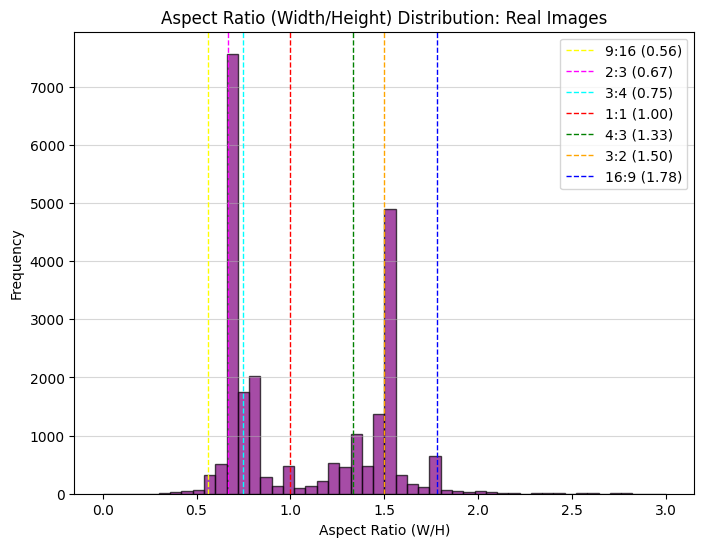

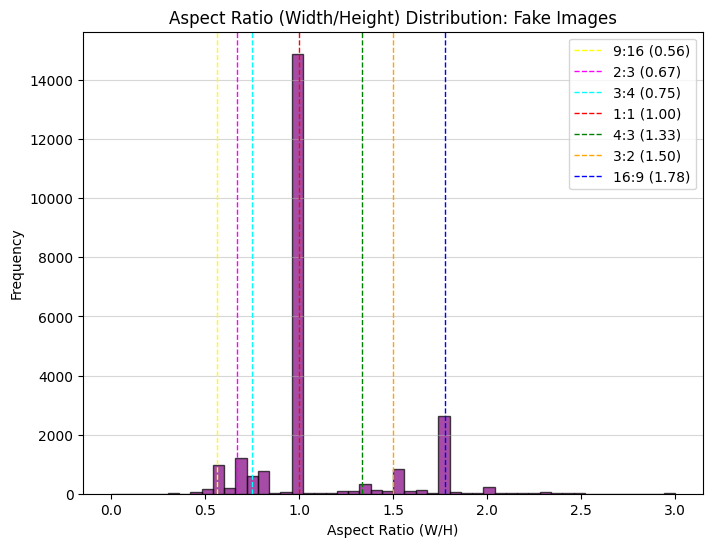

In [64]:
def plot_aspect_ratio_histogram(aspect_ratios, title):
    if not aspect_ratios:
        print(f"Cannot plot aspect ratios for {title}: No data.")
        return

    plt.figure(figsize=(8, 6))
    # Define bins focusing around common ratios (e.g., 1:1, 4:3, 16:9) and handle outliers
    # You might need to adjust bins based on your data range
    plt.hist(aspect_ratios, bins=50, color='purple', edgecolor='black', alpha=0.7, range=(0, 3)) # Limit range for better visualization, adjust as needed
    plt.title(f"Aspect Ratio (Width/Height) Distribution: {title}")
    plt.xlabel("Aspect Ratio (W/H)")
    plt.ylabel("Frequency")

    plt.axvline(9/16, color='yellow', linestyle='dashed', linewidth=1, label=f'9:16 ({9/16:.2f})')   
    plt.axvline(2/3, color='magenta', linestyle='dashed', linewidth=1, label=f'2:3 ({2/3:.2f})')  
    plt.axvline(3/4, color='cyan', linestyle='dashed', linewidth=1, label=f'3:4 ({3/4:.2f})')    
    plt.axvline(1.0, color='red', linestyle='dashed', linewidth=1, label=f'1:1 ({1.0:.2f})')     
    plt.axvline(4/3, color='green', linestyle='dashed', linewidth=1, label=f'4:3 ({4/3:.2f})')   
    plt.axvline(3/2, color='orange', linestyle='dashed', linewidth=1, label=f'3:2 ({3/2:.2f})')   
    plt.axvline(16/9, color='blue', linestyle='dashed', linewidth=1, label=f'16:9 ({16/9:.2f})')  

    plt.legend()
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Plot histograms
if real_aspect_ratios:
    plot_aspect_ratio_histogram(real_aspect_ratios, "Real Images")
if fake_aspect_ratios:
    plot_aspect_ratio_histogram(fake_aspect_ratios, "Fake Images")